# Arbre de Décision

Les arbres de décision (Decision Tree) sont une méthode d'apprentissage supervisé non paramétrique utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples déduites des caractéristiques des données.

la séparation de l'arbre de décision se fait grâce à l'impurté de Gini : 
$$
\mathbf{G(Q)} = \sum_{k \in C} p_k (1-p_k), \\
p_k = \frac{1}{\mathbf{N_Q}} \sum_{x \in Q} \mathbb{1}_{y_{class} = k} \\
\text{où Q est l'ens des données et C : les classes}
$$
plus le score de Gini est faible plus ça signifie que le variable sépare bien des chose, dont le but est de minimiser le score de Gini.
mauis il faut calculer la moyenne pondérer pour evaluer correctement la qualit´e d’une coupure.
$$
G_{\text{pondéré}} =
\frac{n_g}{n} G(t_g) + \frac{n_d}{n} G(t_d),
$$
où :
- $n$ est le nombre total d'observations dans le nœud parent,
- $n_g$ et $n_d$ sont les effectifs des sous-nœuds gauche et droit.

# cas pratique

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('data/penguins_size.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [24]:
df['species'].unique()

<StringArray>
['Adelie', 'Chinstrap', 'Gentoo']
Length: 3, dtype: str

In [25]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df['sex'].unique()

<StringArray>
['MALE', 'FEMALE', '.']
Length: 3, dtype: str

In [28]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [29]:
df[df['species'] == 'Gentoo'].groupby('sex').describe()

culmen_length_mm                                                        \
                  count       mean       std   min    25%   50%     75%   max   
sex                                                                             
.                   1.0  44.500000       NaN  44.5  44.50  44.5  44.500  44.5   
FEMALE             58.0  45.563793  2.051247  40.9  43.85  45.5  46.875  50.5   
MALE               61.0  49.473770  2.720594  44.4  48.10  49.5  50.500  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
.                  1.0  15.700000  ...             217.0  217.0         1.0   
FEMALE            58.0  14.237931  ...             215.0  222.0        58.0   
MALE              61.0  15.718033  ...             225.0  231.0        61.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                                      
.       4875.000000         NaN  4875.0  4875.0  4875.0  4875.0  4875.0  
FEMALE  4679.741379  281.578294  3950.0  4462.5  4700.0  4875.0  5200.0  
MALE    5484.836066  313.158596  4750.0  5300.0  5500.0  5700.0  6300.0  

[3 rows x 32 columns]

In [30]:
df.at[336,'sex'] = 'FEMALE' # map

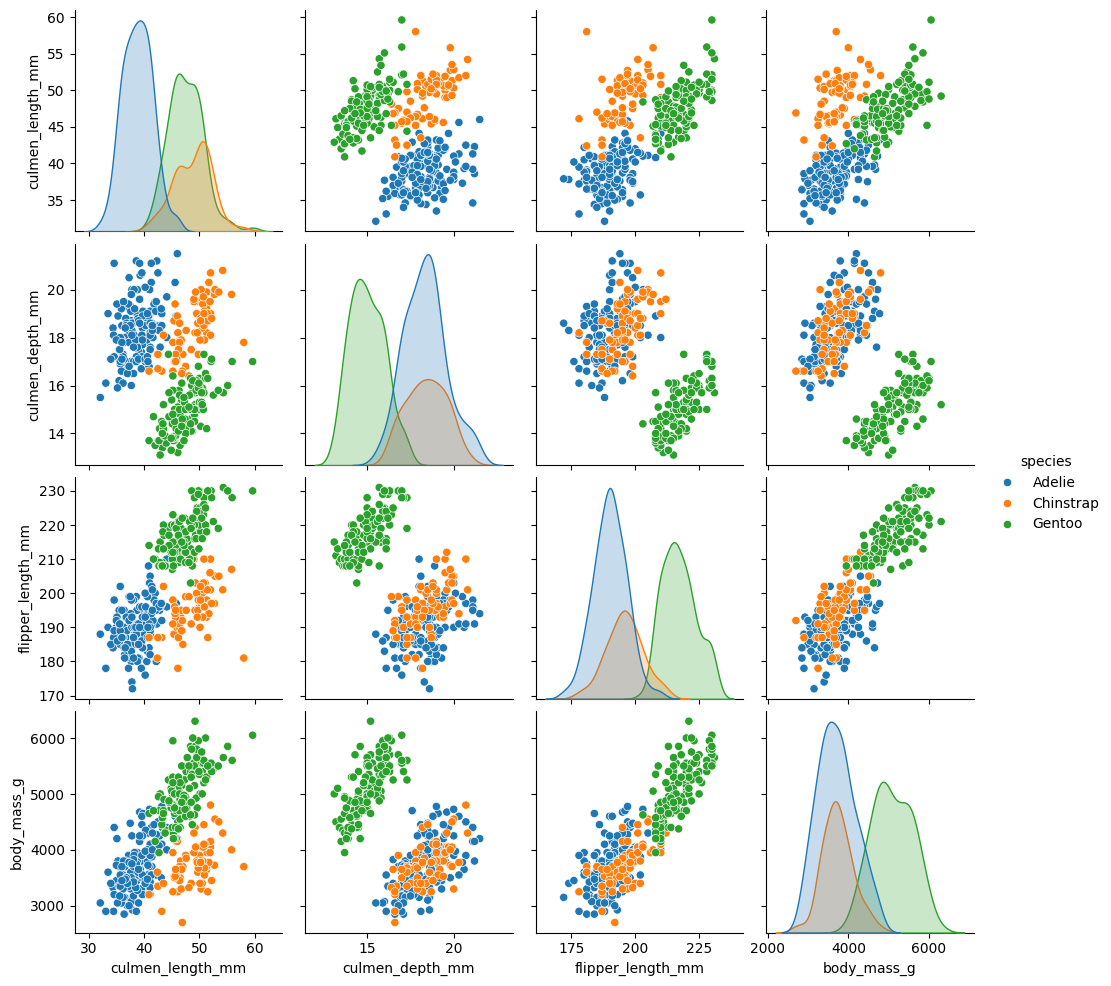

In [31]:
sns.pairplot(df, hue='species')

In [32]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree avec Gini

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



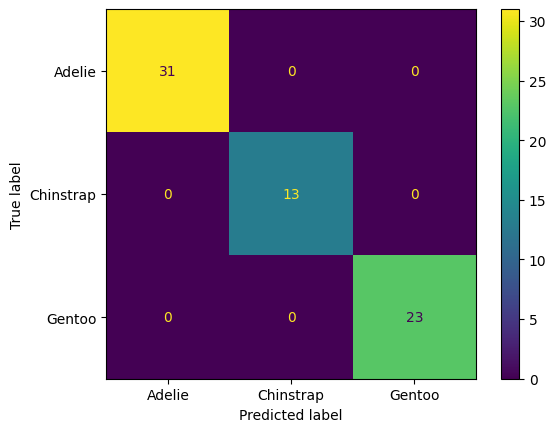

In [35]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [36]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['importance feature']).sort_values('importance feature', ascending=False)

,importance feature
flipper_length_mm,0.507703
culmen_length_mm,0.349063
culmen_depth_mm,0.087826
island_Dream,0.033464
sex_MALE,0.021943
body_mass_g,0.000000
island_Torgersen,0.000000


In [37]:
from sklearn.tree import plot_tree

## Decision Tree avec Entropy

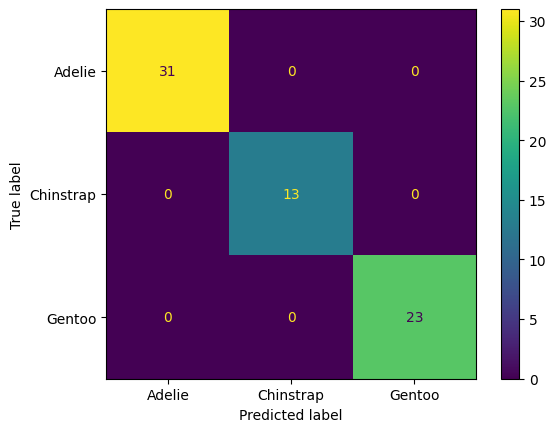

In [38]:
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model_entropy, X_test, y_test);

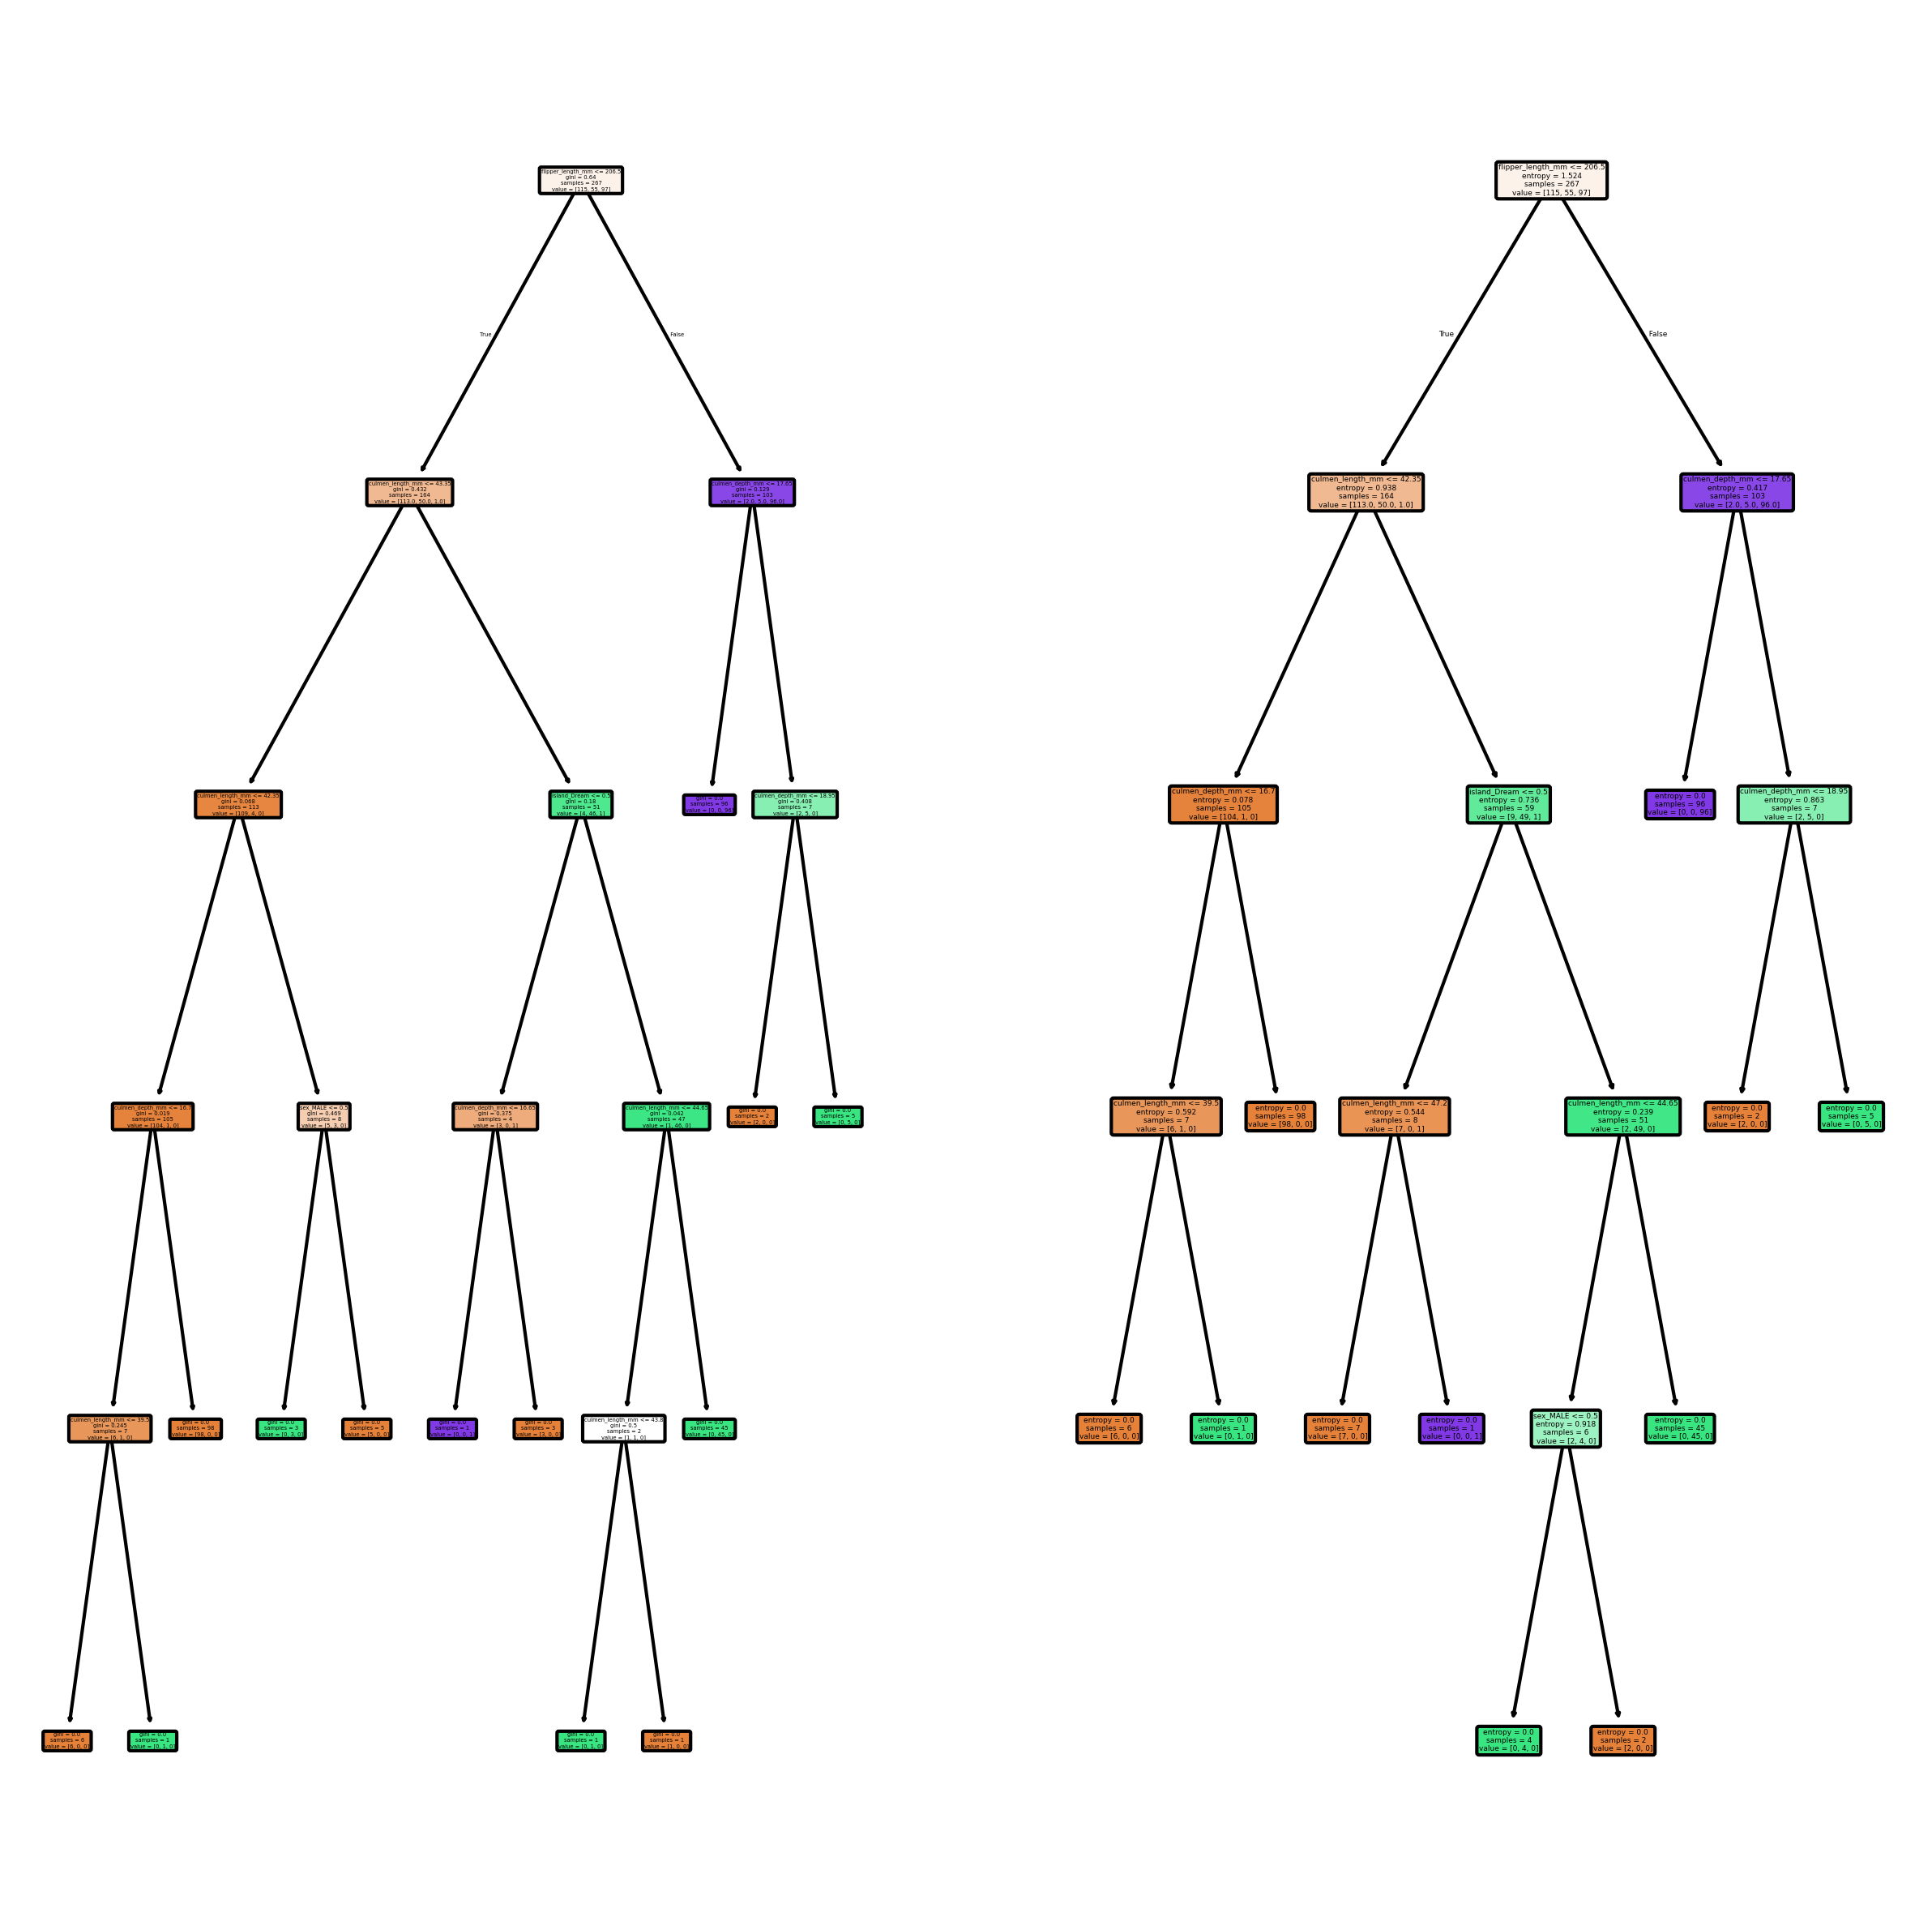

In [39]:
fig = plt.figure(figsize=(10,10),dpi=300)
plt.subplot(121)
plot_tree(model,feature_names=X.columns, filled=True, rounded=True);
plt.subplot(122)
plot_tree(model_entropy,feature_names=X.columns, filled=True, rounded=True);

possible de optimiser avec les profondeur arbre.etc.